### Fit S21 traces for R79_F12_4p16

In [1]:
from pathlib import Path
from rrfit.hangerfit import fit_s21_v2
from betata.resonator_studies.trace import Trace, load_traces, save_traces

CWD = Path.cwd()

Specify input folder and output file

In [2]:
resonator_name = "R79_F12_4p16"
input_folder = CWD / f"data/resonator_studies/{resonator_name}"
output_file = CWD / f"out/resonator_studies/{resonator_name}.h5"

Load traces

In [3]:
traces: list[Trace] = load_traces(input_folder)

Fit traces

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 35
    # data points      = 480
    # variables        = 4
    chi-square         = 0.28260695
    reduced chi-square = 5.9371e-04
    Akaike info crit   = -3561.99248
    Bayesian info crit = -3545.29733
    R-squared          = np.complex128(-2284444594975.736+20391690545213.953j)
[[Variables]]
    fr:     4.1640e+09 +/- 4.29808717 (0.00%) (init = 4.164049e+09)
    Ql:     4073080.04 +/- 34136.1402 (0.84%) (init = 4336381)
    absQc:  6706751.25 +/- 48283.1471 (0.72%) (init = 7109520)
    phi:    0.04846226 +/- 0.00723460 (14.93%) (init = 0.05057005)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     10353465.4 +/- 135016.050 (1.30%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(fr, phi)   = -0.8701
    C(Ql, absQc) = +0.8662
    C(fr, Ql)    = +0.1612
    C(Ql, phi)   = -0.1360


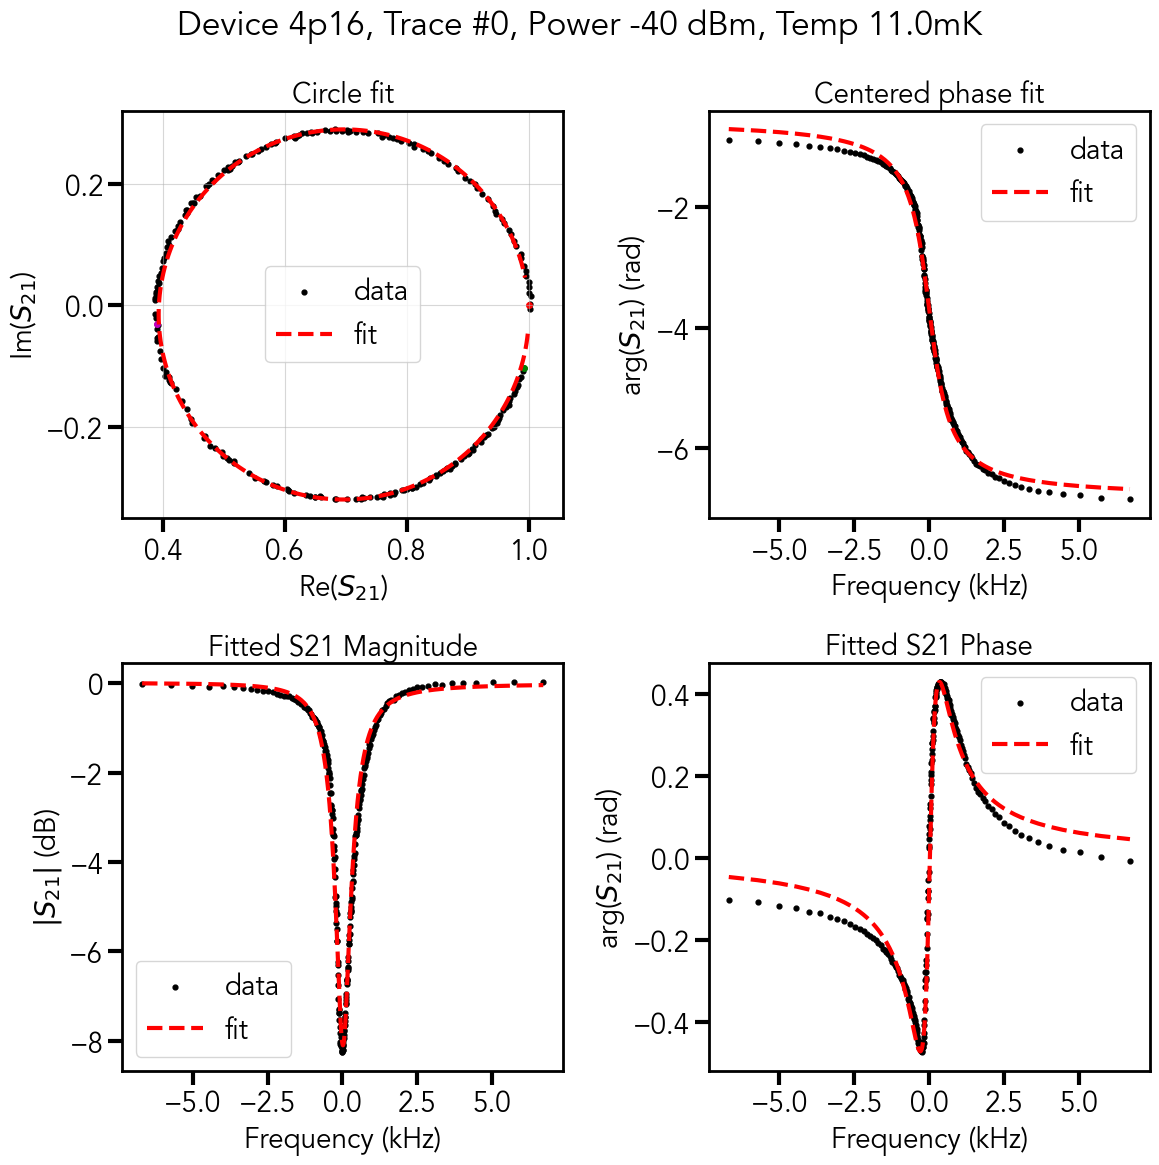

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 25
    # data points      = 480
    # variables        = 4
    chi-square         = 0.03096190
    reduced chi-square = 6.5046e-05
    Akaike info crit   = -4623.41632
    Bayesian info crit = -4606.72118
    R-squared          = np.complex128(3453893420885.629+7585131199224.177j)
[[Variables]]
    fr:     4.1640e+09 +/- 1.78993066 (0.00%) (init = 4.16405e+09)
    Ql:     3601648.89 +/- 10995.3046 (0.31%) (init = 4289863)
    absQc:  6458534.09 +/- 16747.2392 (0.26%) (init = 7685602)
    phi:   -0.08014464 +/- 0.00264843 (3.30%) (init = -0.08022828)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     8109398.66 +/- 35457.6656 (0.44%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(fr, phi)   = -0.8675
    C(Ql, absQc) = +0.8502
    C(Ql, phi)   = -0.2435
    C(fr, Ql)    = +0.1421


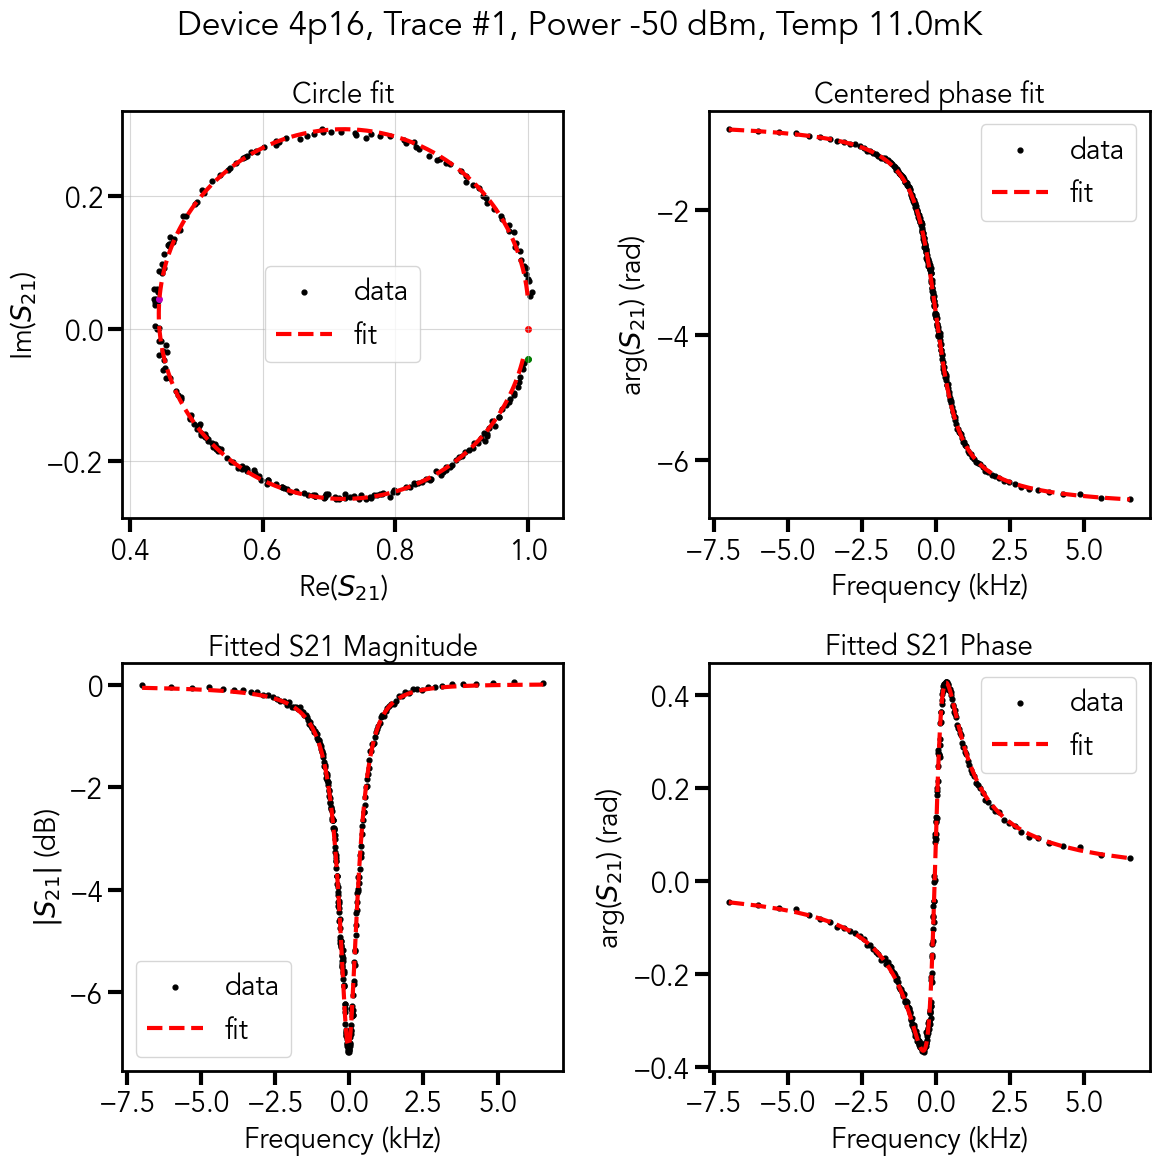

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 27
    # data points      = 480
    # variables        = 4
    chi-square         = 0.03282745
    reduced chi-square = 6.8965e-05
    Akaike info crit   = -4595.33262
    Bayesian info crit = -4578.63748
    R-squared          = np.complex128(2099547022519.729+956676239119.1665j)
[[Variables]]
    fr:     4.1640e+09 +/- 2.27994500 (0.00%) (init = 4.164049e+09)
    Ql:     3181565.65 +/- 11116.8980 (0.35%) (init = 3793234)
    absQc:  6451104.23 +/- 19606.1110 (0.30%) (init = 7680055)
    phi:   -0.07306734 +/- 0.00302592 (4.14%) (init = -0.07364069)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     6261268.45 +/- 28318.6764 (0.45%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(Ql, absQc) = +0.8762
    C(fr, phi)   = -0.8727
    C(fr, Ql)    = +0.1280
    C(fr, absQc) = +0.1201


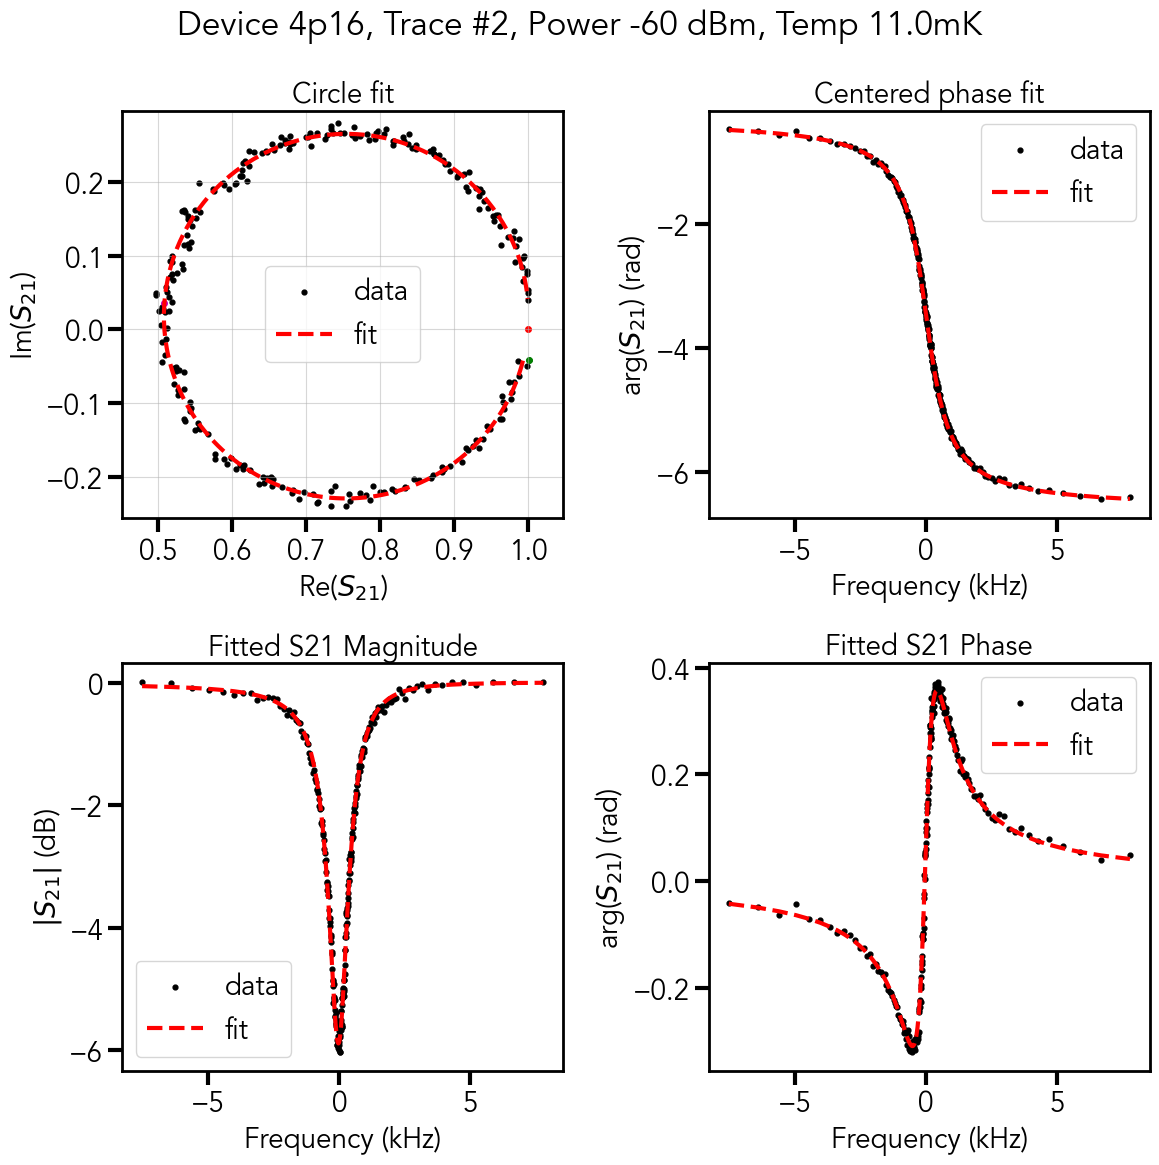

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 28
    # data points      = 480
    # variables        = 4
    chi-square         = 0.07592432
    reduced chi-square = 1.5950e-04
    Akaike info crit   = -4192.86609
    Bayesian info crit = -4176.17094
    R-squared          = np.complex128(3319301453432.864+6602885273283.087j)
[[Variables]]
    fr:     4.1640e+09 +/- 4.62484282 (0.00%) (init = 4.164049e+09)
    Ql:     2745147.86 +/- 16905.7478 (0.62%) (init = 3349053)
    absQc:  6266788.71 +/- 33064.0535 (0.53%) (init = 7608199)
    phi:   -0.09677015 +/- 0.00519817 (5.37%) (init = -0.09830904)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     4867262.22 +/- 37628.1587 (0.77%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(Ql, absQc) = +0.8645
    C(fr, phi)   = -0.8522
    C(fr, absQc) = +0.2116
    C(fr, Ql)    = +0.1084


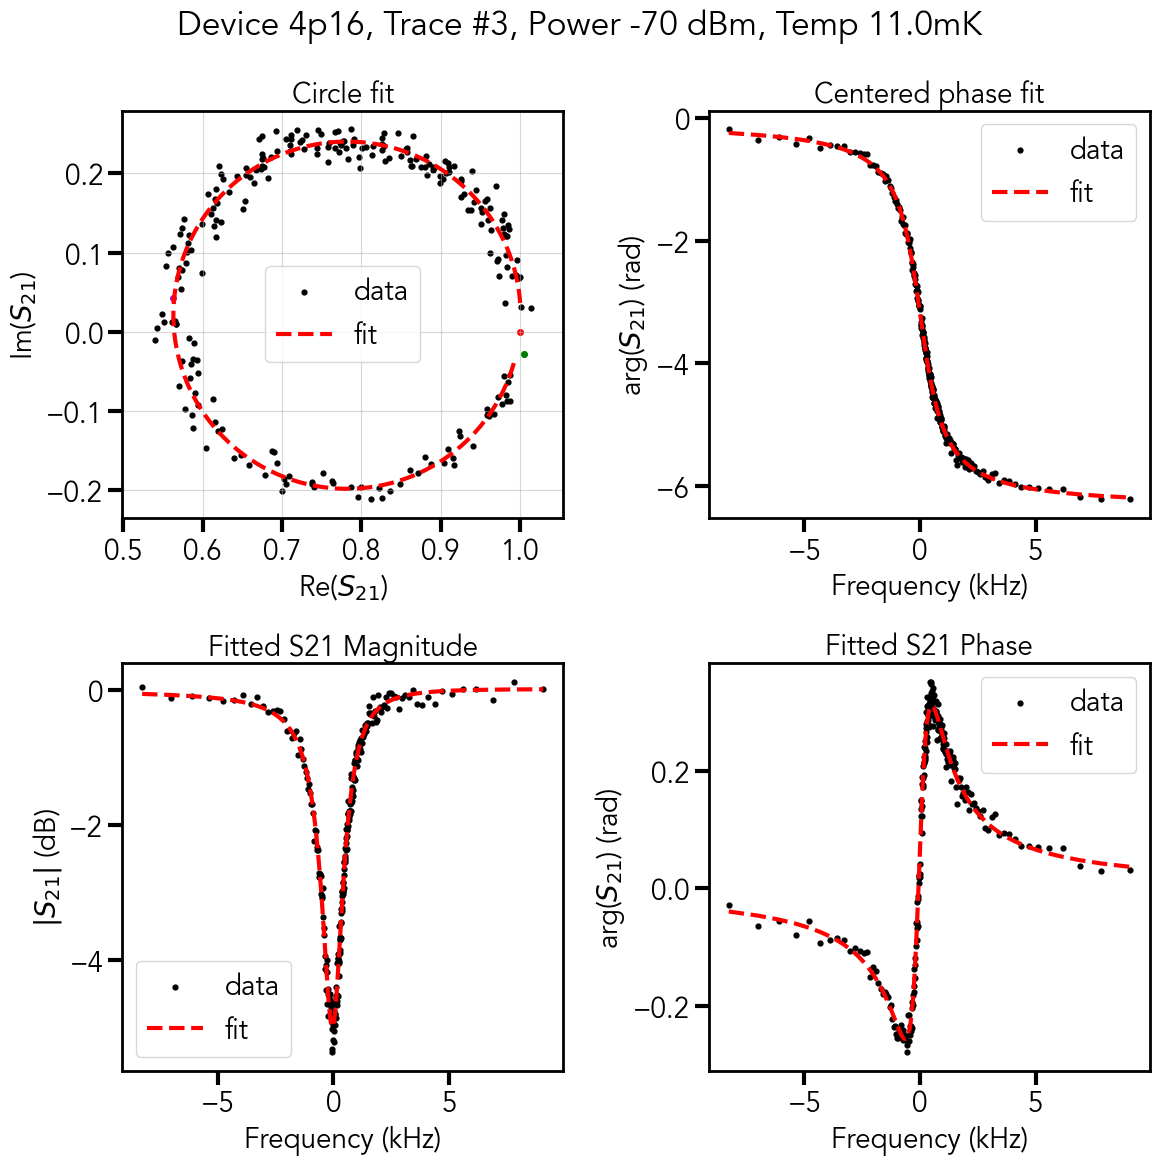

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 27
    # data points      = 480
    # variables        = 4
    chi-square         = 0.46150293
    reduced chi-square = 9.6954e-04
    Akaike info crit   = -3326.58543
    Bayesian info crit = -3309.89028
    R-squared          = np.complex128(-639043750090.0436+75431646293738.62j)
[[Variables]]
    fr:     4.1640e+09 +/- 14.8347488 (0.00%) (init = 4.164048e+09)
    Ql:     2341812.57 +/- 39568.1861 (1.69%) (init = 2886690)
    absQc:  5704439.79 +/- 80389.3798 (1.41%) (init = 6811999)
    phi:   -0.06777119 +/- 0.01382999 (20.41%) (init = -0.07743838)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     3966364.80 +/- 84156.8332 (2.12%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(Ql, absQc) = +0.8421
    C(fr, phi)   = -0.8258
    C(fr, absQc) = +0.2720
    C(Ql, phi)   = +0.1626


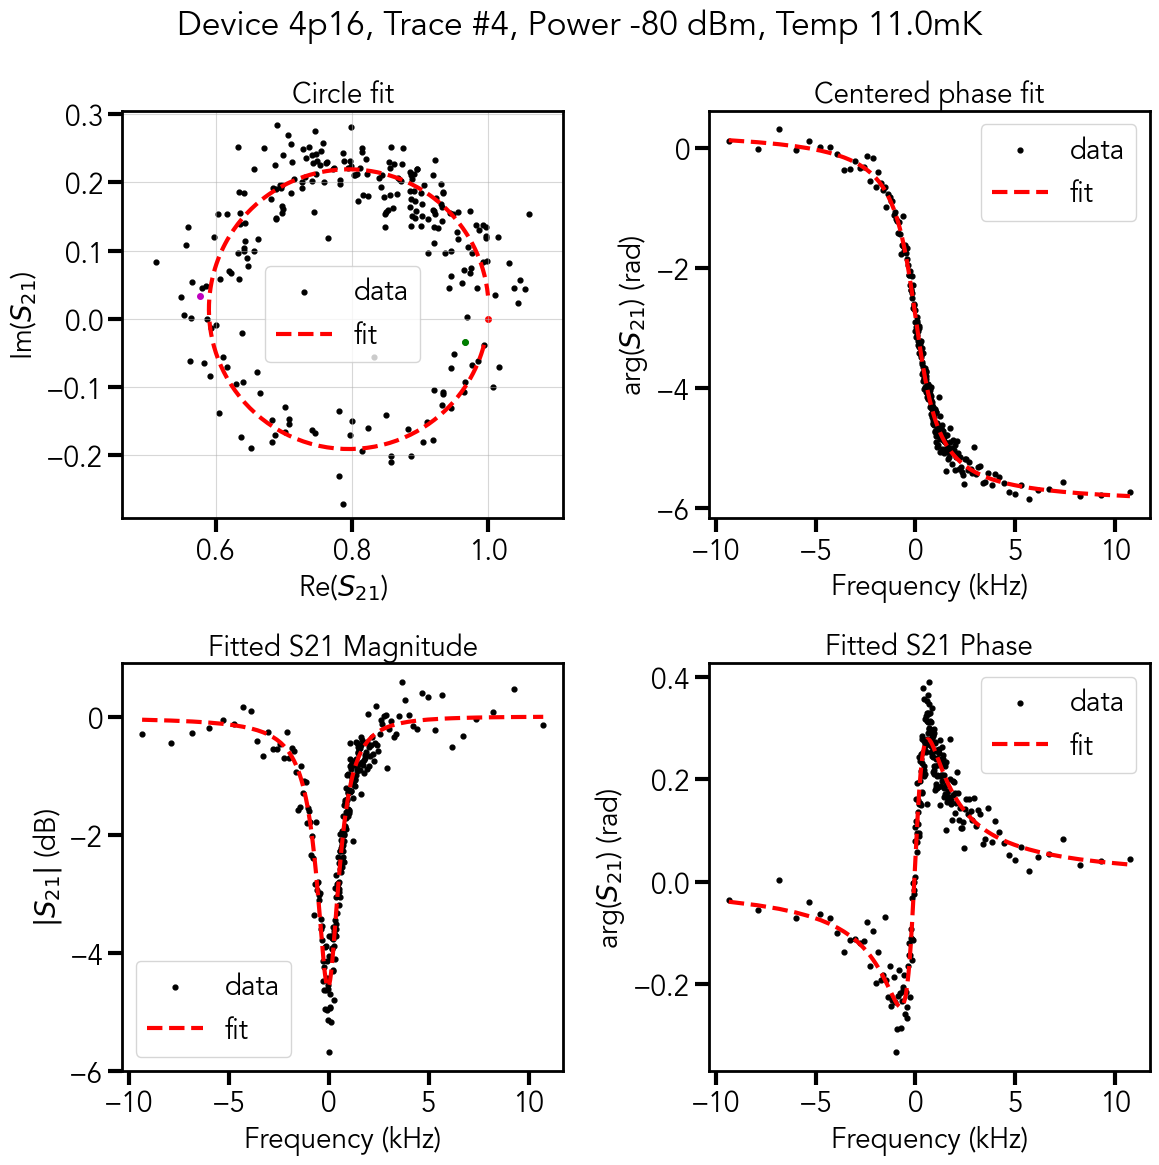

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 26
    # data points      = 480
    # variables        = 4
    chi-square         = 2.10019681
    reduced chi-square = 0.00441218
    Akaike info crit   = -2599.24242
    Bayesian info crit = -2582.54728
    R-squared          = np.complex128(104859269405306.31-24018343420429.27j)
[[Variables]]
    fr:     4.1640e+09 +/- 41.5151698 (0.00%) (init = 4.164047e+09)
    Ql:     2025867.21 +/- 82980.0042 (4.10%) (init = 2430235)
    absQc:  5186099.36 +/- 168423.990 (3.25%) (init = 5614424)
    phi:    0.02095984 +/- 0.03181476 (151.79%) (init = -0.106917)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     3324081.59 +/- 172487.886 (5.19%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(Ql, absQc) = +0.8018
    C(fr, phi)   = -0.7819
    C(fr, absQc) = +0.3338
    C(Ql, phi)   = +0.2508


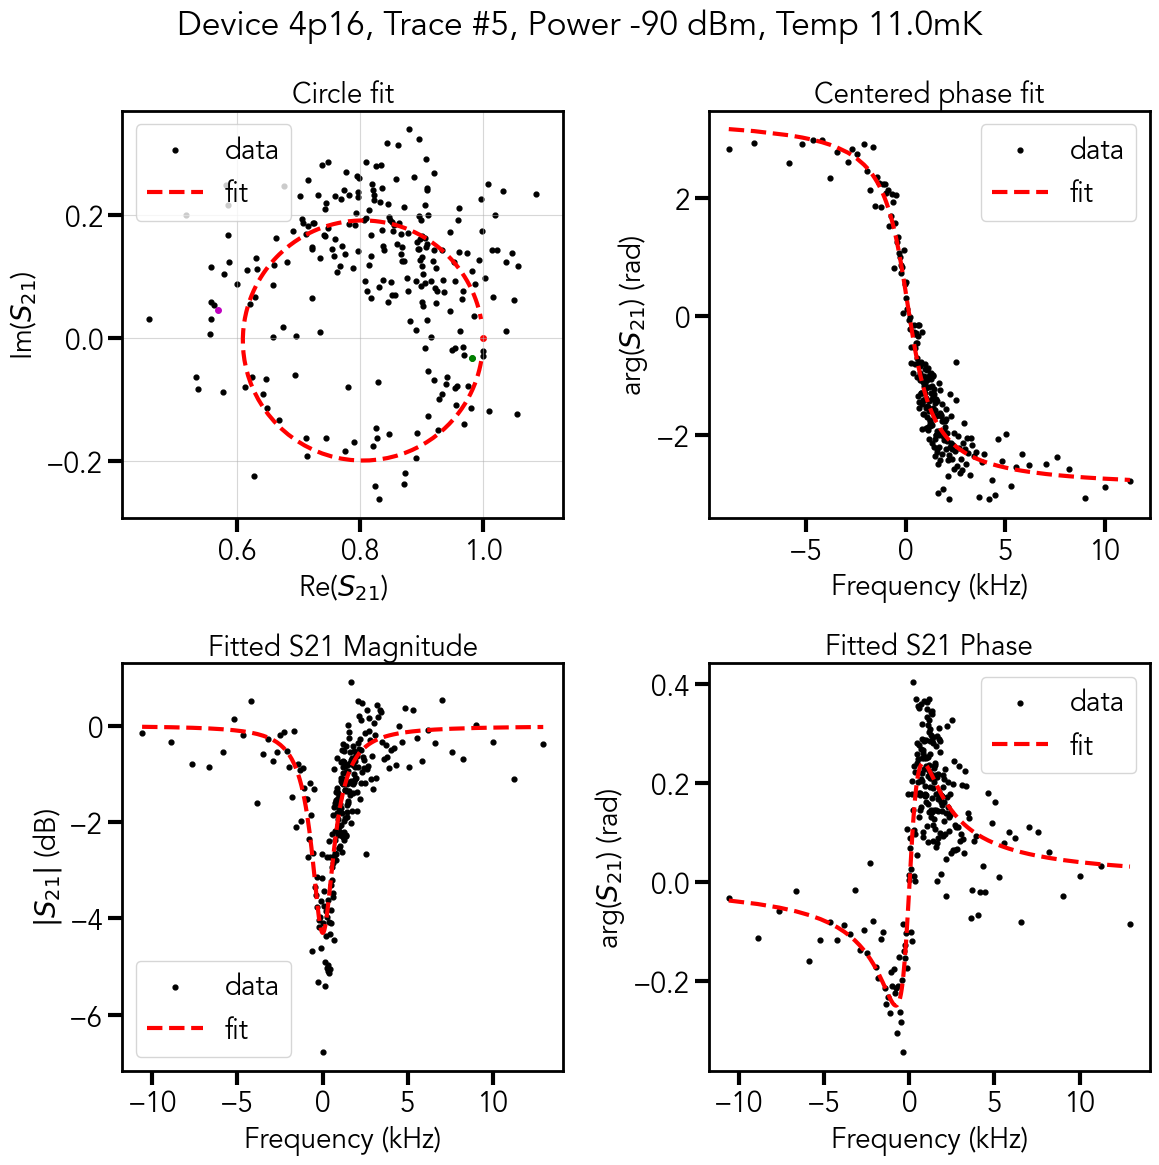

In [4]:
for trace in traces:
    plot_title = f"Device {trace.resonator_name}, Trace #{trace.id}, Power {trace.power} dBm, Temp {trace.temperature * 1e3:.1f}mK"
    fit_s21_v2(trace, plot_title=plot_title)

Exclude traces

In [5]:
traces_to_exclude = []
for trace in traces:
    if trace.id in traces_to_exclude:
        trace.is_excluded = True
    else:
        trace.is_excluded = False

Save fitted traces

In [6]:
save_traces(traces, output_file)